# Lab 1
### William Olsen

In this lab we will be becoming familiar with git & Github as well as some distributions and probabilities.

In [2]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A Little Statistics

### Part 1

Let's consider the standard normal distribution.  We would like to see what probabilities that we get for certain sigma values.

In [3]:
# lets try a few values of sigma and see what probabilities that we get.

sigma_1 = 1
sigma_2 = 2
sigma_5 = 5

prob_sigma_1 = stats.norm.cdf(sigma_1)
prob_sigma_2 = stats.norm.cdf(sigma_2)
prob_sigma_5 = stats.norm.cdf(sigma_5)

print(f'Probability = {prob_sigma_1} for Sigma = {sigma_1}')
print(f'Probability = {prob_sigma_2} for Sigma = {sigma_2}')
print(f'Probability = {prob_sigma_5} for Sigma = {sigma_5}')

Probability = 0.8413447460685429 for Sigma = 1
Probability = 0.9772498680518208 for Sigma = 2
Probability = 0.9999997133484281 for Sigma = 5


In [4]:
# most of the time we want to do the reverse, so lets take the resulting probabilities and
# ensure that we can convert them back to a sigma correctly.

sigma_1_prime = stats.norm.ppf(prob_sigma_1)
sigma_2_prime = stats.norm.ppf(prob_sigma_2)
sigma_5_prime = stats.norm.ppf(prob_sigma_5)

print(f'For Probability = {prob_sigma_1} got Sigma = {sigma_1_prime}.  Expected Sigma = {sigma_1}.')
print(f'For Probability = {prob_sigma_2} got Sigma = {sigma_2_prime}.  Expected Sigma = {sigma_2}.')
print(f'For Probability = {prob_sigma_5} got Sigma = {sigma_5_prime}.  Expected Sigma = {sigma_5}.')

For Probability = 0.8413447460685429 got Sigma = 1.0.  Expected Sigma = 1.
For Probability = 0.9772498680518208 got Sigma = 2.0000000000000004.  Expected Sigma = 2.
For Probability = 0.9999997133484281 got Sigma = 4.999999999970176.  Expected Sigma = 5.


We see above that the conversion from sigma to a probability and back is correct and we recover, approximatly, the same value of sigma.

### Part 2

Next we will explore a continous distribution.  Here we will be looking at the Rayleigh distribution specifically.  This distribution is a continuous distribution for a collection of non-negative random variables.  Commonly Rayleigh distributions arise in nature when the components of a vector are related to the magnitude of said vector.

The Rayleigh distribution has the following functions of interest:

$$\text{pdf} = \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} \text{, cdf} = 1 - e^{-x^2 / (2\sigma^2)}$$

Where pdf is the _probability density function_ and cdf is the _cumulative distribution function_ which are both only defined when $x \ge 0$.

We will now make an analytic plot of the function and of 100k random draws from the function to see the behavior of the central limit theorem with the Rayleigh distribution.

In [17]:
# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

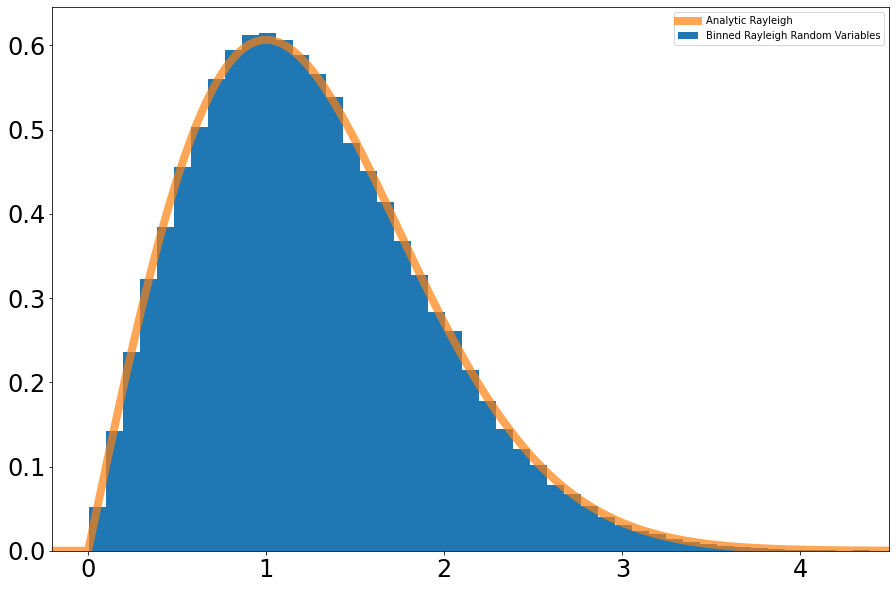

In [22]:
# lets first draw the the 100k points from the distribution
draw = stats.rayleigh.rvs(size=100000)

# now lets group those points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [-0.2, 4.5]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh')

# adjust information about the graph
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.legend()

plt.show()

### Part 3

Suppose that we have a signal-free source which we are collecting data from.  Further suppose that this source follows the Rayleigh distribution.

Now let's suppose that my signal is $7\sigma$.  

I would like to ask the following question:

> What is the probability that my signal-free source produces a signal that is equally or more signal like than the signal I have observed?

Mathematically, this question can be represetned with the following integral:

$$\text{Probability} = \int_{7\sigma}^{\infty} \text{pdf}(x) dx = \int_{7\sigma}^{\infty} \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} dx$$

Now let us calculate this probability...

In [ ]:
# TODO